In [1]:
#Setup
import math
import matplotlib.pyplot as plt
import matplotlib.animation as animation

import numpy as np
from scipy.optimize import fsolve
from IPython.display import HTML

In [2]:
#Construct a system of equations - used to solve for theta at a given X (used later)

#Returns an equation to be used in a non-linear solver
def thetaAtX(p,X):
    t1, t2 = p
    y = .5
    return (0.4 * math.cos(t1) + 0.35 * math.cos(t2) - X,0.4 * math.sin(t1) + 0.35 * math.sin(t2) - y)

x_p1 = -.4 * math.cos(math.pi / 6) + 0.35 * math.cos(math.pi / 3)


#Solve the non-linear system of equations
t1_ta, t2_ta = fsolve(thetaAtX, [math.pi / 2, math.pi / 2], args=x_p1)
t1_t = t1_ta % (2 * math.pi)
t2_t = t2_ta % (2 * math.pi)
print('Angle AB = ', t1_t, 'Expected ~', math.pi - math.pi/6)
print('Angle BC = ', t2_t, 'Expected ~', math.pi/3)

Angle AB =  2.6247163461412 Expected ~ 2.6179938779914944
Angle BC =  1.0427820873160454 Expected ~ 1.0471975511965976


In [3]:
#Set up a general function to solve w_ab, w_bc given the angle of the two arms
print(t1_t, t2_t)
def computeVelGen(t1, t2):
    L_ab = .4
    L_bc = .35
    w_ab = -.1 / (L_ab * (-math.sin(t2) * math.cos(t1) / math.cos(t2) + math.sin(t1)))
    w_bc = -w_ab * L_ab * math.cos(t1) / (L_bc * math.cos(t2))
    
    return w_ab, w_bc

def computeAccelGen(wab,wbc,t1,t2):
    L_ab = 0.4
    L_bc = 0.35
    
    
    
    wbcsin = .35*math.sin(t2)*wbc**2
    wabsin = .4*math.sin(t1)*wab**2
    
    a_bcnonab = (-.4*math.cos(t1)*wab**2 - .35*math.cos(t2)*wbc**2)/(.4*math.sin(t1))
    
    a_bc = (wbcsin + wabsin - 0.4*math.cos(t1)*(a_bcnonab))/(.35*math.cos(t2) - 0.35*math.cos(t1)*math.sin(t2)/math.sin(t1))
    a_ab = (-.4*math.cos(t1)*wab**2 - .35*math.cos(t2)*wbc**2 - .35*math.sin(t2)*a_bc)/(.4*math.sin(t1))
    
    return a_ab, a_bc

#Test with position 1
t1_init = math.pi - math.pi/6
t2_init = math.pi/3
wab_t, wbc_t = computeVelGen(t1_t, t2_t)
print('W_ab = ', wab_t, ', expected ~-0.13')
print('W_bc = ', wbc_t, ', expected ~-0.25')

aab_t,abc_t = computeAccelGen(wab_t,wbc_t,t1_t,t2_t)
print('a_ab = ', aab_t, ', expected ~-0.0536')
print('a_bc = ', abc_t, ', expected ~-0.0179')

2.6247163461412 1.0427820873160454
W_ab =  -0.1259625673178665 , expected ~-0.13
W_bc =  -0.24840599168625238 , expected ~-0.25
a_ab =  -0.05381896569302897 , expected ~-0.0536
a_bc =  0.017447045297462396 , expected ~-0.0179


Text(0, 0.5, 'Alpha (rad^2/s)')

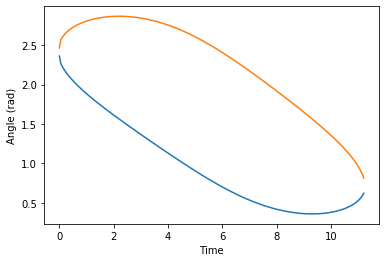

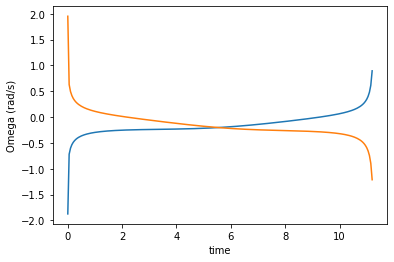

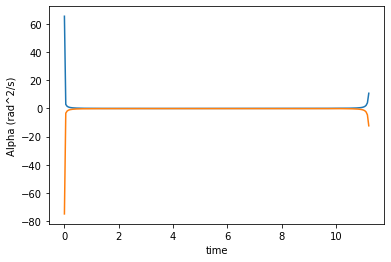

In [5]:
#Build a simulation for this system...

#Possible X values
Xmin = -.75*math.acos(math.asin(-.5/-.75))
Xmax = -1.0 * Xmin 
Xrange = np.arange(Xmin+0.007,Xmax-.007,0.001) 

#Data storage
w_ab = np.zeros(Xrange.shape)
w_bc = np.zeros(Xrange.shape)
t1 = np.zeros(Xrange.shape)
t2 = np.zeros(Xrange.shape)
t1_a = np.zeros(Xrange.shape)
t2_a = np.zeros(Xrange.shape)

#Time interval
t = 0.05


#Find the angles of the arms near the left most possible x-value



#setup lists to store data (storing much more than needed for plotting purposes)
w_ab_all = []
w_bc_all = []
xy_bc = []
xy_ab = []
x_hist = []
y_hist = []
t1_hist = []
t2_hist = []
time = []
time_t = 0
#Setup initial conditions
t1_prev, t2_prev = fsolve(thetaAtX, [math.asin(-.5 / -.75) + math.pi / 2, math.asin(-.5 / -.75)
+ math.pi/2],args=Xrange[0]) #Find angle of arms near the left-most possible point at this height
xpos = Xrange[0]
#t1_prev = math.pi/6
#t2_prev = math.pi - math.pi/3

#Run the simulation, stopping when we approach x = Xmax
while xpos < Xmax:
    w_ab_t, w_bc_t = computeVelGen(t1_prev, t2_prev) #compute velocities
    w_ab_all.append(w_ab_t)
    w_bc_all.append(w_bc_t)
    xy_bc.append([.35 * math.cos(t2_prev), .35 * math.sin(t2_prev)]) #compute r_vectors 
    xy_ab.append([.4 * math.cos(t1_prev),.4 * math.sin(t1_prev)])
    


    xpos = .4 * math.cos(t1_prev) + .35 * math.cos(t2_prev) #Compute the x, y pos at C at this position (could do later)
    ypos = .4 * math.sin(t1_prev) + .35 * math.sin(t2_prev)
    t1_hist.append(t1_prev) #Store angle at time point (not required,)
    t2_hist.append(t2_prev)
    x_hist.append(xpos)
    y_hist.append(ypos)
    time.append(time_t)
    time_t = time_t + t
    t1_prev = t1_prev + t * w_ab_t #Compute new angles
    t2_prev = t2_prev + t * w_bc_t
    
    #print(xpos)
len(time)
#Simple Plots 
# plt.figure()
# plt.plot(x_hist,w_ab_all)
# plt.plot(x_hist,w_bc_all)

#Angle vs time
plt.figure()
plt.plot(time,t1_hist)
plt.plot(time,t2_hist)
plt.xlabel('Time')
plt.ylabel('Angle (rad)')

#Velocity vs time
plt.figure()
plt.plot(time,w_ab_all)
plt.plot(time,w_bc_all)
plt.xlabel('time')
plt.ylabel('Omega (rad/s)')

aab, abc = [], []
for a,b,c,d in zip(w_ab_all,w_bc_all,t1_hist,t2_hist):
    aab_t, abc_t = computeAccelGen(a,b,c,d)
    aab.append(aab_t)
    abc.append(abc_t)

plt.figure()
plt.plot(time,aab)
plt.plot(time,abc)
plt.xlabel('time')
plt.ylabel('Alpha (rad^2/s)')


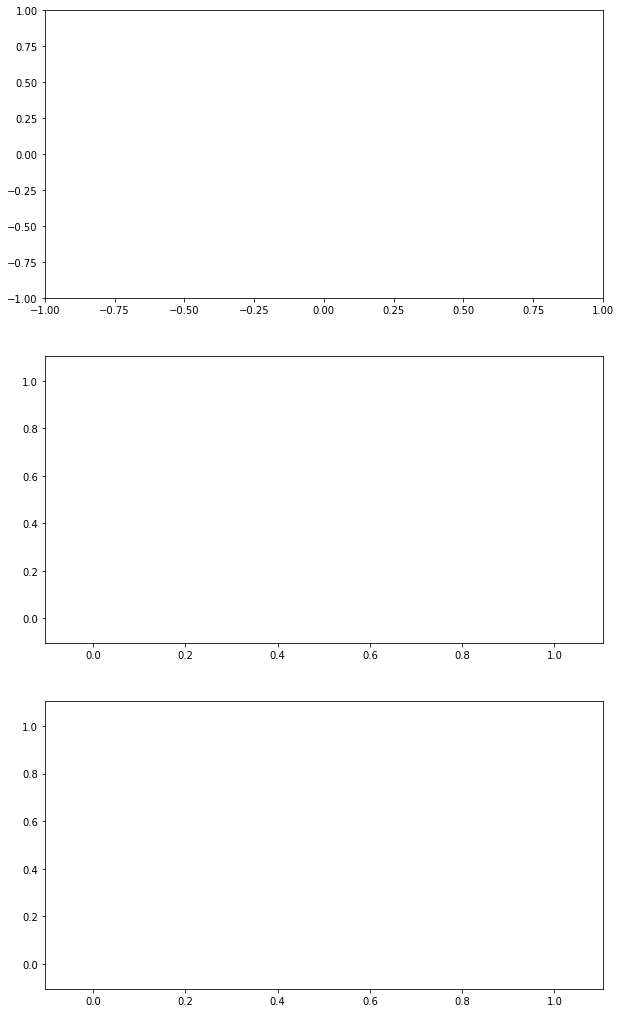

In [6]:
fig, axarr = plt.subplots(nrows=3, ncols=1, figsize=(10, 18))
axarr[0].set_xlim(left=-1, right=1)
axarr[0].set_ylim(bottom=-1, top=1)
axarr[1].set_xlim(left=0, right=13)
axarr[1].set_ylim(bottom=-2,top=2)
axarr[2].set_xlim(left=0,right=13)
axar
lineab, = axarr[0].plot([],[],color='red')
linebc, = axarr[0].plot([],[],color='green')
linecd, = axarr[0].plot([],[],color='blue')
linehist, = axarr[0].plot([],[],color='black')

linewab, = axarr[1].plot([],[])
linewbc, = axarr[1].plot([],[])

lineaab, = axarr[2].plot([],[])
lineabc, = axarr[2].plot([],[])
c_histx = []
c_histy = []
c_histx.append([-.75*math.acos(math.asin(-.5/-.75))])
c_histy.append(0.5)
def init():
    lineab.set_data([],[])
    linebc.set_data([],[])
    linecd.set_data([],[])
    linehist.set_data([],[])
    
    linewab.set_data([],[])
    linewbc.set_data([],[])
    
    lineaab.set_data([],[])
    lineabc.set_data([],[])
    #return (lineab,linebc,linecd,linehist,)

def animate(i):
    a = [0, 0]
    b = [xy_ab[i][0] + a[0], xy_ab[i][1] + a[1]]
    c = [xy_bc[i][0] + b[0], xy_bc[i][1] + b[1]]
    d = [c[0] + .3 * math.cos(math.pi / 3), c[1] - .3 * math.sin(math.pi / 3)]

    lineab.set_data(np.array([a[0], b[0]]), np.array([a[1], b[1]]))
    linebc.set_data(np.array([b[0], c[0]]), np.array([b[1], c[1]]))
    linecd.set_data(np.array([c[0], d[0]]), np.array([c[1], d[1]]))
    linehist.set_data(np.array(x_hist[0:i]),np.array(y_hist[0:i]))
    
    linewab.set_data(time[0:i],w_ab_all[0:i])
    linewbc.set_data(time[0:i],w_bc_all[0:i])

    lineaab.set_data(time[0:i],aab[0:i])
    lineabc.set_data(time[0:i],abc[0:i])
    #axarr.plot(np.array(c_histx),np.array(c_histy),color='black')

ani=animation.FuncAnimation(fig, animate, init_func=init, frames=len(w_ab_all), interval=20, repeat=True)
HTML(ani.to_html5_video())